In [1]:
import random

import cv2
import matplotlib.pyplot as plt

import albumentations as A

In [2]:
def show(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

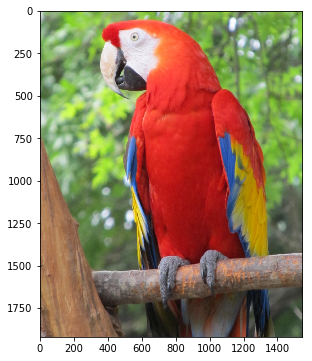

In [3]:
image = cv2.imread('./images/parrot.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image)

In [4]:
transform = A.Compose([
    A.RandomCrop(768, 768),
    A.OneOf([A.RGBShift(), A.HueSaturationValue()]),
])
print(transform)

Compose([
  RandomCrop(height=768, width=768, always_apply=False, p=1.0),
  OneOf([
    RGBShift(r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20), always_apply=False, p=0.5),
    HueSaturationValue(hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20), always_apply=False, p=0.5),
  ], p=0.5),
], p=1.0)


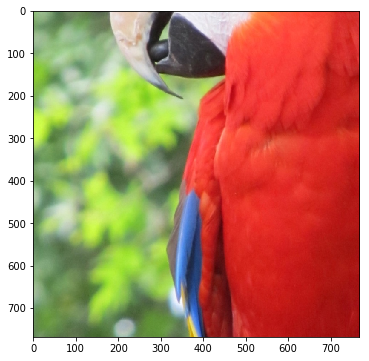

In [5]:
random.seed(42)
augmented_image = transform(image=image)['image']
show(augmented_image)

In [6]:
dumped_transform = A.dump(transform)
print(dumped_transform)

{"__version__": "0.2.3", "state": {"__name__": "albumentations.core.composition.Compose", "p": 1.0, "transforms": [{"__name__": "albumentations.augmentations.transforms.RandomCrop", "height": 768, "width": 768, "always_apply": false, "p": 1.0}, {"__name__": "albumentations.core.composition.OneOf", "p": 0.5, "transforms": [{"__name__": "albumentations.augmentations.transforms.RGBShift", "r_shift_limit": [-20, 20], "g_shift_limit": [-20, 20], "b_shift_limit": [-20, 20], "always_apply": false, "p": 0.5}, {"__name__": "albumentations.augmentations.transforms.HueSaturationValue", "hue_shift_limit": [-20, 20], "sat_shift_limit": [-30, 30], "val_shift_limit": [-20, 20], "always_apply": false, "p": 0.5}]}]}}


In [7]:
loaded_transform = A.load(dumped_transform)
print(loaded_transform)

Compose([
  RandomCrop(height=768, width=768, always_apply=False, p=1.0),
  OneOf([
    RGBShift(r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20), always_apply=False, p=0.5),
    HueSaturationValue(hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20), always_apply=False, p=0.5),
  ], p=0.5),
], p=1.0)


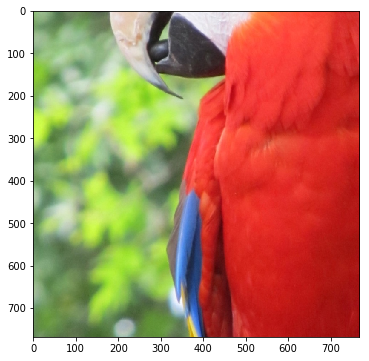

In [8]:
random.seed(42)
augmented_image = loaded_transform(image=image)['image']
show(augmented_image)